# Data Analysis  in Reactor Design






## Introduction

Chemical Engineering has various components to it such as Process Engineering, Optimization, and Reaction Engineering.

Reaction Engineering focuses on the study of Chemical Reactions, the kinetics and thermodynamics involved, catalysis and reactor design. 

Data science is widely used in Reaction Engineering, primarily for data analysis in catalysis or reactor design.

This tutorial will focus on data analysis in reactor design. It will give an overview of and how data analysis techniques are applied in reactor desing and why they are important.

We will specifically look at parameter estimation using Regression techniques.





## Reactor Design


Design of Reactors is a very important aspect in Chemical Engineering. 

Reactors are equipment which convert reactants to products under certain conditions of temperature and pressure in presence of a catalyst. 

The aim of the reactor is to get a desired amount of product as output. For this, a proportional amount of reactant has to react and be converted to product. 

The ratio of product to reactant is called conversion. Conversion is an important criteria for reactor design. 

To achieve the desired conversion, the reactor should have a certain value which depends on the type of reactor, the conversion desired and the reaction under consideration. 

Volume dictates the amount of time the reactants spend in the reactor. The reactants need to have sufficienct time in the reactor such that the desired conversion is achieved. 

Reactor can be in the form of tanks or tubes. We will not look at different reactor types in this tutorial but focus on generalized design techniques.


### Key terms

We will now look at key terms and understand what role they play.


**Chemical Reaction:**

$ a A + b B + \cdots \rightarrow q Q + s S +\cdots $

This is an example of a chemical reaction. Reactants A and B react and are converted to C and D.

a, b, c, d are called stoichometric coefficients. These represent the quantity of each of the components. We will not work with the stoichiometric coefficients in this tutorial.


**Rate of reaction:**

Consider the reaction $A + B \rightarrow C$
        
For this reaction, the rate of reaction is $r = k C_A C_B$   
 
The rate of reaction dictates how fast the reactant reacts and converts to products. The rate of reaction depends on the concentration ( $C_A$ and $C_B$ ) and the rate constant ( $k$ ). 

**Rate constant:** 
    
Rate constant is dictates how fast or slow the reaction proceeds. Higher values of $k$ result in a higher rate of reaction. Higher concentrations also result in higher rate of reaction.

There is no formula or methodology to calculate the rate constant. The rate constant is experimentally determined and depends on the mechanism of the reaction. Hence there are some uncertainities in the value as well. 

**Concentration:**
    
Concentration is the count of quantity of the component per litre of solution. This is the most common metric used to express concentration. 

'mol' (gram-mole) is the unit of component. 1 gram-mole of component is equal to its molecular weight.

eg: 1 mol (gram-mole) of water = 18 grams

**Order of Reaction**

Order of reaction is determined by the dependency on concentration. For the given example reaction, the order of reaction is 2 because the rate of reaction depends on square of concentration.

The order of reaction need not be integers. The order of reaction depends on the mechanism, just as the rate constant. Mechanisms for some reactions are not known and hence the order of reactions are not known.  


## Motivation

We know that the rate constant and order of reaction are experimentally determined. Imagine the scenario. We have the concentrations, and the time at which these concentrations are observed. From this data, we need to determine the rate constant and the order of reaction. 

This is where data analysis is useful. Regression can be used to determine the unknown parameters given the data.

## Examples

We can start off with a simple example on how regression is applied.

 ###  **Linear Regression**
 
 We will use simple linear regression to fit the curve for this example. 
 
 We will use *linear algebra* and the *regress* method from the [*pycse*](http://kitchingroup.cheme.cmu.edu/pycse/pycse.html) package  to fit the data and compare the two fits.

**Using Linear Algebra**

R-squared = 1.000000 
The slope is 0.187 and the intercept is -0.001


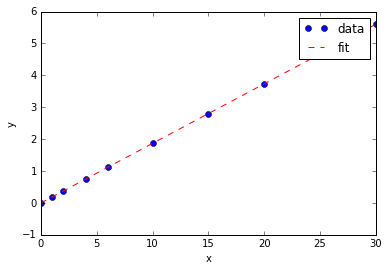

In [64]:
import numpy as np

# Given data

x = np.array([0.0, 1.0, 2.0, 4.0, 6.0, 10.0, 15.0, 20.0, 30.0])
y = np.array([0, 0.187, 0.373, 0.744, 1.118, 1.867, 2.801, 3.735, 5.603])

# Making the linear fit

X = np.column_stack([x, x**0])

XTX = np.dot(X.T, X)
XTy = np.dot(X.T, y)

p = np.dot(np.linalg.inv(XTX), XTy)
slope, intercept = p 

# Calculating the R^2 value using error

e = y - np.dot(X,p)
SSE = np.dot(e, e)

yb = y - np.mean(y)
SST = np.dot(yb, yb)

Rsq = 1 - SSE/SST

# Plotting the data and fit
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x, y, 'bo')
plt.plot(x, np.dot(X, p), 'r--')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['data','fit'])

print('R-squared = {0:1.6f} '.format(Rsq))
print('The slope is {0:1.3f} and the intercept is {1:1.3f}'.format(slope, intercept))

We used a linear fit for the data. A $R^2$ value of 1 indicates a perfect fit. In our case, by visual inspection and the $R^2$ value; we see that the fit is very good.

**Using 'Regress' method from Pycse package**

The Regress method works as a linear least square regression with confidence intervals. The confidence interval helps account for uncertainty in parameters that we estimate after making the fit. 

The values for the slope and intercept are returned as a range.The range gives the value withn which the parameters will lie. 

Higher the confidence interval, larger the range for the parameters. The confidence interval stands for the certainty of the parameters lying the range returned. The confidence interval and range have an inverse relation.

The slope is between [ 0.18669097  0.18689951] at the 95% confidence level
The intercept is between [-0.00253451  0.00031649] at the 95% confidence level


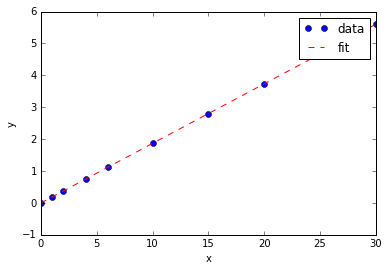

In [65]:
import numpy as np
from pycse import regress

x = np.array([0.0, 1.0, 2.0, 4.0, 6.0, 10.0, 15.0, 20.0, 30.0])
y = np.array([0, 0.187, 0.373, 0.744, 1.118, 1.867, 2.801, 3.735, 5.603])

X = np.column_stack([x, x**0])

# The Regress method with a 95% confidence interval
alpha = 1 - 0.95
p, pint, se = regress(X, y, alpha)
slope_interval, intercept_interval = pint

# plotting the data and fit
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x, y, 'bo')
plt.plot(x, np.dot(X, p), 'r--')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['data','fit'])

print('The slope is between {0} at the 95% confidence level'.format(slope_interval))

print('The intercept is between {0} at the 95% confidence level'.format(intercept_interval))

We can obseve that our curve  fits the data very well like the linear algebra method. As expected, the slope and intercept are returned as a range.

## Regression in Parameter Estimation

In reactor design, the rate constant and order of reaction are important parameters. These parameters are used to determine the volume of the reactor.

Poor estimation of these parameters result in poor reactor design. 

Poor reactor design leads circumstances such as less than desired conversion or even more deleterious consequences like reactor overflow or blowup.

To avoid these potentially hazardous situations, it is necessary to have good estimates.

Even after making a very good fit, there are uncetinities in the parameters. It is necessary to account for these uncertainities while estimating the rate of reaction ($k$) and order of reaction ($alpha$).

### Using polynomial fits

Data of concentration at certain time intervals is given. We will fit this data to estimate the rate constant ( $k$ ) and the order or reaction ( $alpha$ ). 

We plot the data to evaluate what fit would best. 

The rate of reaction is given by the expression

$r_A = k C_A^\alpha$

where,
$k$ : Rate constant
$alpha$ : Order of reaction

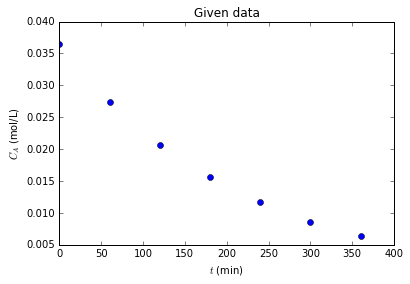

In [66]:
# Given data
t = np.array([0, 60 ,120, 180, 240, 300, 360])
Ca = np.array([0.0365, 0.0274, 0.0206, 0.0157, 0.0117, 0.00860, 0.00640])

import matplotlib.pyplot
%matplotlib inline
plt.plot(t, Ca, 'bo ')
plt.xlabel('$t$ (min)')
plt.ylabel('$C_A$ (mol/L)')
plt.title('Given data')

From the plot we see that a linear fit is bad approximation for the data. So, we use polynomial fit to better fit the curve.


The methods we use for the polynomial fit are explained below:

[**Polyfit**](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html)

This method from Numpy package is used to make a polynomial fit. We can specify the order of the fit. 

This method works as a least squares regression of the chosen order. The data to be fit is passed as the parameters.

The coefficients of the polynomial are returned. 


[**Polyval**](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyval.html)

This method from the Numpy package is used to estimate y values from the fit at given x values. (where y and x are axes in convetional terms)

The fit parameter as obtained by polyfit is passed as one parameter along with the x value at which y value needs to be estimated.


[**Polyder**](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyder.html)

This method from the Numpy package is used for differentiation. 

A sequence of coefficeicnts of polynomials is one parameter and order of differentiation is the other parameter.

**Polynomial Fit**

Summed squared error = 1.41202262212e-32
R-squared = 1.000000 
alpha = [ 0.77194515  1.00688954] at 95% confidence level
k = [ 0.00189601  0.00509979] at 95% confidence level


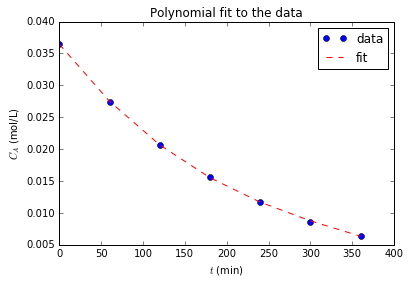

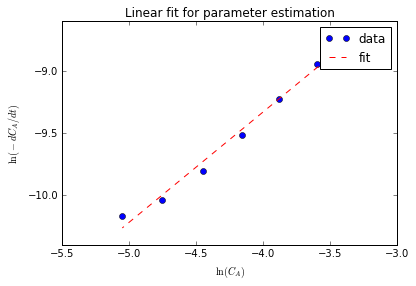

In [67]:
import numpy as np
from numpy import polyfit, polyval, polyder
from pycse import regress
import matplotlib.pyplot as plt

#Given data
t = np.array([0, 60 ,120, 180, 240, 300, 360])
Ca = np.array([0.0365, 0.0274, 0.0206, 0.0157, 0.0117, 0.00860, 0.00640])

# Using polyfit to fit the data - polynomial of order 3 is chosen 
fit_Ca = np.polyfit(t, Ca, 3)

# Using polyval to estimate values are given time (x values)
# The fit values are passed as an argument to polyval
val_Ca = np.polyval(fit_Ca, t)

#Computing the R-squared value

SSE = np.sum(val_Ca - Ca)**2

y_Rsq = val_Ca - np.mean(Ca)
SST = np.dot(y_Rsq, y_Rsq)

Rsq = 1 - SSE/SST

print('Summed squared error = {}'.format(SSE))
print('R-squared = {0:1.6f} '.format(Rsq))

# Plotting the polynomial fit to the data
%matplotlib inline
plt.plot(t, Ca, 'bo ')
plt.plot(t, val_Ca,'r--')
plt.xlabel('$t$ (min)')
plt.ylabel('$C_A$ (mol/L)')
plt.title('Polynomial fit to the data')
plt.legend(['data','fit'])

# Computing the derivative
# The fit parameter is passed as arguments to polyder.
# Polyder results and time are passed as arguments to polyval to compute the deriatives
dCadt = np.polyval(np.polyder(fit_Ca), t)

# Construct the data to be fit
# ln(-dCa/dt) = alpha ln(Ca) + ln(k) 
x = np.log(Ca)
y = np.log(-dCadt)

#Fitting the data with a confidence interval of 95%
X = np.column_stack([x**0, x])
alpha = 1 - 0.95
p, pint, se = regress(X, y, alpha)

intercept = pint[0]
alpha = pint[1]

# The intercept is ln(k). Calculating k here
k = np.exp(intercept)

print('alpha = {} at 95% confidence level'.format(alpha))
print('k = {0} at 95% confidence level'.format(k))

# Plotting the derivative form of the data and fit
plt.figure()
plt.plot(x, y, 'bo ')
plt.plot(x, np.dot(X, p),'r--')
plt.xlabel('$\ln(C_A)$')
plt.ylabel('$\ln(-dC_A/dt)$')
plt.title('Linear fit for parameter estimation')
plt.legend(['data','fit'])

We fit the data using a fourth order polynomial. We can observe from SSE and $R^2$ that it is a very good fit.

Choosing an appropriate order of polynomial is important. A lower order gives a poor fit and a higher order results in overfitting.

As expected, the values of $k$ and $alpha$ are returned as a range. But the range is pretty broad, which means that there is considerable uncertainty in their values.

This makes designing a reactor more difficult as higher uncertainty has to be accounted for. Lower uncertainty tends to make the reactor design better.

Good designs are important to reach the desired conversion and concentration of the product. We will evaluate another way of fitting to reduce the uncertainties.

### Using Differential Equation based models

We numerically integrate the Ordinary Differential Equation: Concentration with respect to time. The parameters we need to estimate are passed as arguments. We will use the method [*odeint*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) for the integration.

We use a method called *nlinft* to vary the parameters and fit the data. The ODE is passed as an argument. The data that we wish to fit and the confidence interval are also passed as arguments. 

**nlinfit**:

This method from the [*pycse*](http://kitchingroup.cheme.cmu.edu/pycse/pycse.html) package is nonlinear regression. In addition to the arguments mentioned above, this also requires a guess for the parameters that we wish to estimate. 

The array of fitted parameters, array of confidence intervals and the Standard error are returned.


In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from pycse import  nlinfit

#Given data
t = np.array([0, 60 ,120, 180, 240, 300, 360])
Ca = np.array([0.0365, 0.0274, 0.0206, 0.0157, 0.0117, 0.00860, 0.00640])

#Starting point for integration - first value of Ca
Ca0 = 0.0365

#Forming the ODE
def dCadt(Ca, t, k, alpha):
    return -k * Ca**alpha

#Integrating the ODE
def model(t, k, alpha):
    Ca = odeint(dCadt, Ca0, t, args = (k, alpha))
    return Ca[:,0]  # must return a 1D array here

# Initial guesses - from the polynomial fit
guess = [0.1, 2.0] 

#Fitting the data with a confidence interval of 95%
alpha = 1 - 0.95
p, pint, se = nlinfit(model, t, Ca, guess, alpha)

k, alpha = np.array(pint)

print('alpha = {} at the 95% confidence level'.format(alpha))
print('k = {0} at the 95% confidence level'.format(k))

alpha = [ 0.92353839  1.01880091] at the 95% confidence level
k = [ 0.00348317  0.00504751] at the 95% confidence level


We can observe that the range for the values of $k$ and $alpha$ are much smaller than the polynomial fit at the same confidence interval.

In this case, we are directly fitting the data with the parameters. The drawback of this approach is that good initial guesses are necessary. Poor guesses can gice erronous results. 

Hence, although this approach yields good estimates, it is inconvenient to use without some knowledge of the system.




### End Note on Parameter Estimation

We have seen how the parameters like the Order of Reaction and Rate Cosntant can be estimated with fairly high accuracies. We used linear and nonlinear regression techniques for curve fitting. We used visual inspection and the R-squared values to determine the quality of the fit.

The examples given in the tutorial are not involved. Simple reaction mechanisms are chosen. The regression models are also easy to build and solve.

This is not the case in practical design. But, now we have seen basic techniques on how to tackle problems like these.




## Conclusion ##

Through this tutorial we have seen how data analysis tools such as regression are useful in Reactor Design. Using the parameters estimated, conversions and exit concentration of products are evaluated. The required volume to reach the desired conversion is determined. 

This evaluation is out of scope of this tutorial. But we have seen how the basics of regression used in Reaction Engineering. We know how regression is useful to determine parameters and why uncertainities in estimations are problematic. We have seen how to reduce the uncertainities and what challenges we face in doing so.

We are now equipped with the know-how and tools to tackle simple regression problems, and we know the limitations of those tools. 



## Acknowledgements

The author would like to acknowledge Prof. John Kitchin from Chemical Engineering Department, Carnegie Mellon University as the author of the Pycse module. 

The author has also used concepts and code  from the class 06-665 Chemical and Reactive Systems by Prof. John Kitchin as basis for this tutorial.

 Website : http://kitchingroup.cheme.cmu.edu
 
 Github : https://github.com/jkitchin/pycse  
 
 Download Pycse : https://pypi.python.org/pypi/pycse
 


Data for Linear Regression examples is complied by the author.

Data for Parameter Estimation is from * Chemistry, LibreTexts, Example 1.1* http://chem.libretexts.org/Core/Physical_and_Theoretical_Chemistry/Kinetics/Reaction_Rates/Using_Graphs_to_Determine_Rate_Laws

### References for Reaction Engineering 

1) Chemical Reaction Engineering: Octave Levenspiel; *John Wiley and Sons*

2) Elements of Chemical Reaction Engineering: Brian Vicente, Max Nori, H. Scott Fogler; *Prentice Hall*